### Importing the required libraries

In [1]:
#import sys
#!{sys.executable} -m pip install praw

In [2]:
import praw
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd 
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
import string 
import glob as gb
from sklearn.cluster import KMeans
import string
import nltk
from nltk.stem import WordNetLemmatizer
import spacy
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
from sklearn.manifold import MDS
import matplotlib.pyplot as plt
import os
from sklearn import decomposition
from sklearn.decomposition import TruncatedSVD
import pyLDAvis
import pyLDAvis.sklearn
import matplotlib as mpl
from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS

To start scrapping the data on Reddit, we need to create an application through Reddit using 'PRAW'.
The next step is to authenticate ourselves and provide the client_id , client_secret and a user_agent details.

In [3]:
reddit = praw.Reddit(client_id='lgFamI8vtt8fQg', client_secret='5yUdYa8iqeoTtaZIMQswZ0Yq128', user_agent='Abhishek')


### Let us start scrapping the required posts  

In [4]:
posts = []
ml_subreddit = reddit.subreddit('H1B')
for post in ml_subreddit.hot(limit=None):
    posts.append([post.title, post.score, post.id, post.subreddit, post.url, post.num_comments, post.selftext, post.created])
    
posts0 = pd.DataFrame(posts,columns=['title', 'score', 'id', 'subreddit', 'url', 'num_comments', 'body', 'created'])
#print(posts0)

In [5]:
# Let us create an empty set to get the sentiment analysis:
set0=set()
for submission in reddit.subreddit('H1B').top(limit=None):
    set0.add(post.title)
   

In [6]:
posts0.shape

(989, 8)

In [7]:
posts0.head()

,title,score,id,subreddit,url,num_comments,body,created
0,A few simple rules to follow/comply with.,19,c6k7e2,h1b,https://www.reddit.com/r/h1b/comments/c6k7e2/a...,0,This sub is solely for purposes of discussing ...,1.561757e+09
1,"PSA: H1B / COVID19 - no furlough, no unemploym...",38,fwkh84,h1b,https://www.reddit.com/r/h1b/comments/fwkh84/p...,0,Very similar questions are being asked here an...,1.586295e+09
2,Have any of you had any issues through Border ...,5,hrvpw7,h1b,https://www.reddit.com/r/h1b/comments/hrvpw7/h...,1,,1.594875e+09
3,H1B transfer before October 1 start date? I’m ...,0,hs20i1,h1b,https://www.reddit.com/r/h1b/comments/hs20i1/h...,0,"As the title said, I’m currently on an F1 Stud...",1.594898e+09
4,"My H1-b petition is in process, if my petition...",3,hrjd3l,h1b,https://www.reddit.com/r/h1b/comments/hrjd3l/m...,1,When can I switch to a new job? After I get th...,1.594828e+09


In [8]:
posts = []

ml_subreddit = reddit.subreddit('H1B+suspension')
for post in ml_subreddit.top("all"):
    posts.append([post.title, post.score, post.id, post.subreddit, post.url, post.num_comments, post.selftext, post.created])
    
posts1 = pd.DataFrame(posts,columns=['title', 'score', 'id', 'subreddit', 'url', 'num_comments', 'body', 'created'])
#print(posts1)

In [9]:
set2=set()

for submission in reddit.subreddit('H1B+suspension').new(limit=None):
    set2.add(submission.title)
   

In [10]:
posts = []

ml_subreddit = reddit.subreddit('Trump+suspends+H1b')
for post in ml_subreddit.new(limit=None):
    posts.append([post.title, post.score, post.id, post.subreddit, post.url, post.num_comments, post.selftext, post.created])
    
posts2 = pd.DataFrame(posts,columns=['title', 'score', 'id', 'subreddit', 'url', 'num_comments', 'body', 'created'])
#print(posts2)
posts2.head()

,title,score,id,subreddit,url,num_comments,body,created
0,Let's create a poll like the left does! This d...,4,hs2y6n,trump,https://www.reddit.com/r/trump/comments/hs2y6n...,1,Who will you vote for in 2020?\n\nAlso if you’...,1.594902e+09
1,why is it?,0,hs2o0y,trump,https://www.reddit.com/r/trump/comments/hs2o0y...,2,I know for a fact I don't agree with most of ...,1.594900e+09
2,I found this on twitterTwitter under one of Tr...,7,hs2ky1,trump,https://i.redd.it/nuduec7455b51.jpg,1,,1.594900e+09
3,H1B transfer before October 1 start date? I’m ...,0,hs20i1,h1b,https://www.reddit.com/r/h1b/comments/hs20i1/h...,0,"As the title said, I’m currently on an F1 Stud...",1.594898e+09
4,...,29,hs1pnj,trump,https://i.redd.it/jk429z1gu4b51.jpg,18,,1.594896e+09


In [11]:
set3=set()

for submission in reddit.subreddit('Trump+suspends+H1b').hot(limit=None):
    set3.add(submission.title)
   

In [12]:
# Let us combine all the data to a single file
corpus=[posts0,posts1,posts2]
corpus=pd.concat(corpus)
corpus.head()

,title,score,id,subreddit,url,num_comments,body,created
0,A few simple rules to follow/comply with.,19,c6k7e2,h1b,https://www.reddit.com/r/h1b/comments/c6k7e2/a...,0,This sub is solely for purposes of discussing ...,1.561757e+09
1,"PSA: H1B / COVID19 - no furlough, no unemploym...",38,fwkh84,h1b,https://www.reddit.com/r/h1b/comments/fwkh84/p...,0,Very similar questions are being asked here an...,1.586295e+09
2,Have any of you had any issues through Border ...,5,hrvpw7,h1b,https://www.reddit.com/r/h1b/comments/hrvpw7/h...,1,,1.594875e+09
3,H1B transfer before October 1 start date? I’m ...,0,hs20i1,h1b,https://www.reddit.com/r/h1b/comments/hs20i1/h...,0,"As the title said, I’m currently on an F1 Stud...",1.594898e+09
4,"My H1-b petition is in process, if my petition...",3,hrjd3l,h1b,https://www.reddit.com/r/h1b/comments/hrjd3l/m...,1,When can I switch to a new job? After I get th...,1.594828e+09


In [13]:
corpus.shape

(3013, 8)

In [14]:
#Dropping the duplicate entries
corpus = corpus.drop_duplicates()
corpus.shape

(2328, 8)

In [15]:
#Save the corpus to the csv file, for future use
corpus.to_csv('corpus.csv',index=False)

In [16]:
#Accessing the file from the target location
os.chdir("C:/Users/abhis/Desktop/Project")
files=gb.glob('*.csv')
files

['corpus.csv']

In [17]:
#drop the null values
corpus=corpus.dropna(axis=1)

In [18]:
#Defining the function to preproess the text data
def preprocess(txt, punct = True, numbers = True, lemmatize = True,):
    
    txt = txt.lower()
   
   
    if punct:
        p = string.punctuation
        tbl = str.maketrans(p, len(p) * " ")
        txt = txt.translate(tbl)
    if numbers:
        d = string.digits
        tbl = str.maketrans(d, len(d) * " ")
        txt = txt.translate(tbl)
    
    
    stopwords=set(nltk.corpus.stopwords.words('english'))
    tokens=nltk.word_tokenize(txt)
    word_list = [i for i in tokens if i not in stopwords and len(i) > 2]
    
    
    
  
    if lemmatize:
        lemma = WordNetLemmatizer()
        word_list =[lemma.lemmatize(w) for w in word_list]
        
        
        
    txt = " ".join(word_list)
    return txt

In [19]:
#Getiing the required columns for analysis

corpus['Target']=corpus['title'].str.cat(corpus['body'],sep=" ")

In [20]:
docs=[]
corpus=corpus['Target'].tolist()
combined_abstracts = " ".join(corpus)
cleaned_abstracts = preprocess(combined_abstracts)
docs.append(cleaned_abstracts)

### WordCloud:

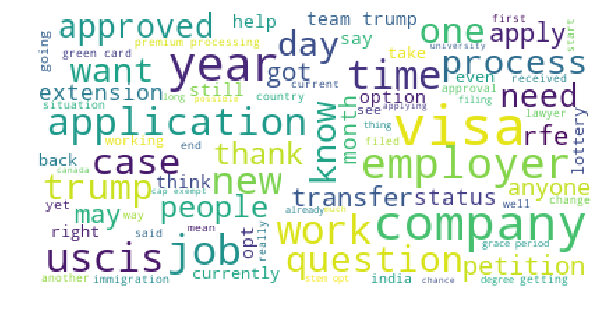

In [21]:
mpl.rcParams['figure.figsize']=(10,10)  
mpl.rcParams['font.size']=12            
mpl.rcParams['savefig.dpi']=100             
mpl.rcParams['figure.subplot.bottom']=.1 
stopwords = set(STOPWORDS)

wordcloud = WordCloud(background_color='white',stopwords=stopwords, max_words=85, max_font_size=40,random_state=17).generate(str(docs))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

## Topic Modeling

### Non-negative Matrix Factorization [NMF]

In [22]:
vectorizer = TfidfVectorizer(stop_words='english')
dtm = vectorizer.fit_transform(docs)
feature_names = vectorizer.get_feature_names() 
names = [fn[:-4] for fn in files] 
topics_count = 10
top_words_count = 10
clf = decomposition.NMF(n_components = topics_count, random_state=1)
doctopic = clf.fit_transform(dtm)
topic_words = []

for topic in clf.components_:   
    word_idx = np.argsort(topic)[::-1][0:top_words_count]   
    topic_words.append([feature_names[i] for i in word_idx])


for t in range(len(topic_words)):  
    print("Topic {}: {}".format(t, ' '.join(topic_words[t][:7])))    


Topic 0: visa trump job year company employer time
Topic 1: proclamation history remotely unpaid affect voting class
Topic 2: freedom hope difficult ppl renewal bernie city
Topic 3: employment airport communist looking update apply various
Topic 4: presence difference entity evidence problem prepare basically
Topic 5: allowed currently sponsorship learn chinese check enemy
Topic 6: state essentially restriction form responsible mention care
Topic 7: push hassle healthy tangible feeling expects watch
Topic 8: fund revenue transferring womenfortrump noting cop ready
Topic 9: mike improvement weaponize street fun fair brother


## Sentiment Analysis

In [23]:
#Create a union of the sets
set0 = set0.union(set2)
set0=set0.union(set3)
#print(set3)

In [24]:
#nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
from IPython import display
import math
from pprint import pprint

sia = SIA()
results = []

for line in set0:
    pol_score = sia.polarity_scores(line)
    pol_score['title'] = line
    results.append(pol_score)

pprint(results[:7], width=100)

[{'compound': 0.3818,
  'neg': 0.0,
  'neu': 0.867,
  'pos': 0.133,
  'title': 'Coronavirus Layoffs Remake Silicon Valley Job Market - Layoffs at Uber, others send '
           'thousands searching for new tech-industry opportunities'},
 {'compound': 0.0,
  'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0,
  'title': 'H1b extension NSC - additional review'},
 {'compound': -0.5661, 'neg': 0.647, 'neu': 0.353, 'pos': 0.0, 'title': 'Pain in spine??'},
 {'compound': 0.0,
  'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0,
  'title': 'So my coworker on an H1B visa just asked to use my info to get a second job. What do I '
           'do?'},
 {'compound': 0.0,
  'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0,
  'title': 'How to find if I am California or Vermont center'},
 {'compound': -0.5423, 'neg': 0.636, 'neu': 0.364, 'pos': 0.0, 'title': 'Bad and Benji'},
 {'compound': -0.4404, 'neg': 0.744, 'neu': 0.256, 'pos': 0.0, 'title': 'Bloody holes'}]


In [25]:
results = pd.DataFrame.from_records(results)
results.head()

,neg,neu,pos,compound,title
0,0.000,0.867,0.133,0.3818,Coronavirus Layoffs Remake Silicon Valley Job ...
1,0.000,1.000,0.000,0.0000,H1b extension NSC - additional review
2,0.647,0.353,0.000,-0.5661,Pain in spine??
3,0.000,1.000,0.000,0.0000,So my coworker on an H1B visa just asked to us...
4,0.000,1.000,0.000,0.0000,How to find if I am California or Vermont center


### Let us divide the dataframe into positive and negative sentiments

In [26]:
results['label'] = 0
results.loc[results['compound'] > 0.1, 'label'] = 1
results.loc[results['compound'] < -0.1, 'label'] = -1
results.head()




,neg,neu,pos,compound,title,label
0,0.000,0.867,0.133,0.3818,Coronavirus Layoffs Remake Silicon Valley Job ...,1
1,0.000,1.000,0.000,0.0000,H1b extension NSC - additional review,0
2,0.647,0.353,0.000,-0.5661,Pain in spine??,-1
3,0.000,1.000,0.000,0.0000,So my coworker on an H1B visa just asked to us...,0
4,0.000,1.000,0.000,0.0000,How to find if I am California or Vermont center,0


### Positive Titles

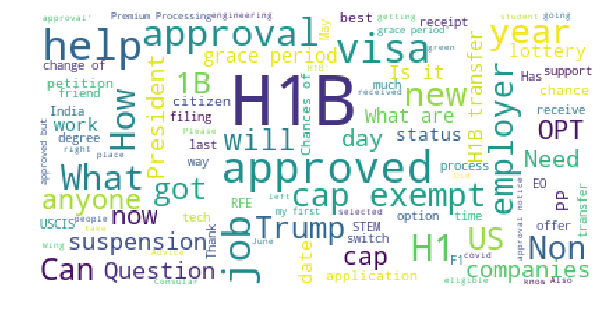

In [27]:
# Create a list of Positive Titles:
postitive_titles=list(results[results['label'] == 1].title)

mpl.rcParams['figure.figsize']=(10,10)  
mpl.rcParams['font.size']=12            
mpl.rcParams['savefig.dpi']=100             
mpl.rcParams['figure.subplot.bottom']=.1 
stopwords = set(STOPWORDS)

wordcloud = WordCloud(background_color='white',stopwords=stopwords, max_words=100, max_font_size=50,random_state=32).generate(str(postitive_titles))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()



### Negative Titles

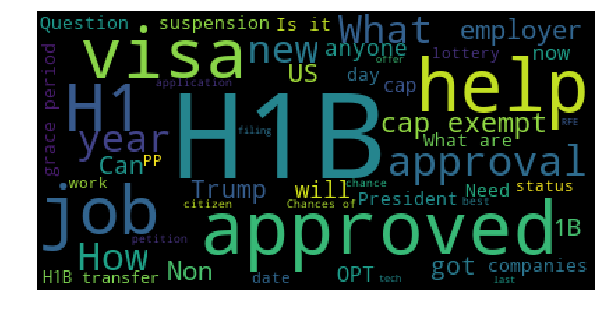

In [28]:
negative_titles=list(results[results['label'] == -1].title)

mpl.rcParams['figure.figsize']=(10,10)  
mpl.rcParams['font.size']=12            
mpl.rcParams['savefig.dpi']=100             
mpl.rcParams['figure.subplot.bottom']=.1 
stopwords = set(STOPWORDS)

wordcloud = WordCloud(background_color='black',stopwords=stopwords, max_words=50, max_font_size=85,random_state=75).generate(str(postitive_titles))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


### Plotting the sentiments type by percentage

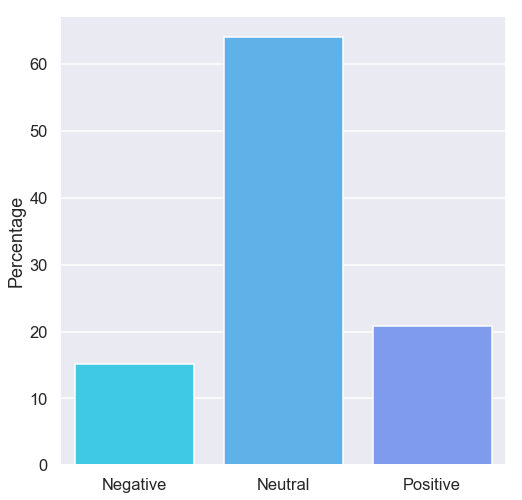

In [29]:
import seaborn as sns
sns.set(style='darkgrid', context='talk', palette='cool')
fig, ax = plt.subplots(figsize=(8, 8))
counts = results.label.value_counts(normalize=True) * 100
sns.barplot(x=counts.index, y=counts, ax=ax)
ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])
ax.set_ylabel("Percentage")
plt.show()